<a href="https://colab.research.google.com/github/Briana-Sevilla/MAT-421/blob/main/Module_H_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Set 11: Module H**

\

---
\
## Section 22.4: Numerical Error and Instability

**Accuracy** refers to how close you are to the exact solution.

An integration scheme is **stable** if its error does not grow as time increases.

An integration scheme is unstable if its error grows as time increases and/or if its stability changes with different step sizes.

Use Euler Explicit, Euler Implicit, and Trapezoidal Formulas to approximate the solution of the following initial value problem between 0 and 1 in increments if 0.1:

The differential equation $\frac{df(t)}{dt}=-e^{-t}$ with initial condition $f_0=1$
>Note: The exact solution is $f(t) = e^{-t}$

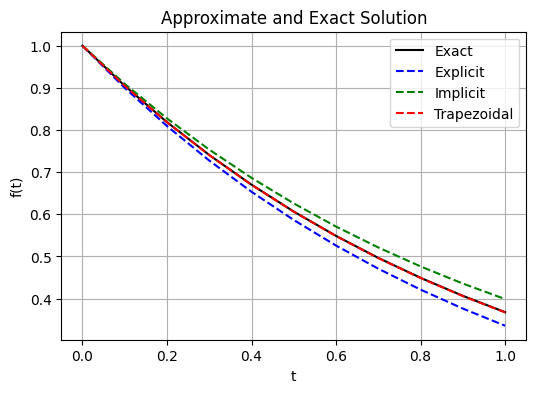

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f = lambda t, s: -np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1+h, h) # Creates numerical grid
S_0 = 1 # Initial condition

# Use Explicit Euler Formula
SE = np.zeros(len(t)) # creates a vector of 11 zeros
SE[0] = S_0 # Replaces first element of vector with initial condition

for i in range(0, len(t) - 1):
  SE[i + 1] = SE[i] + h*f(t[i], SE[i]) # Explicit Euler Formula

# Use Implicit Euler Formula
SI = np.zeros(len(t)) # creates a vector of 11 zeros
SI[0] = S_0 # Replaces first element of vector with initial condition

for i in range(0, len(t) - 1):
  SI[i + 1] = SI[i] + h*f(t[i+1], SI[i+1]) # Implicit Euler Formula

# Use Trapezoidal Formula
ST = np.zeros(len(t)) # creates a vector of 11 zeros
ST[0] = S_0 # Replaces first element of vector with initial condition

for i in range(0, len(t) - 1):
  ST[i + 1] = ST[i] + (h / 2)*(f(t[i], ST[i])
  + f(t[i+1],ST[i+1])) # Trapezoidal Formula


# Plot graph
plt.figure(figsize = (6,4))
plt.plot(t, np.exp(-t), 'k-', label='Exact')
plt.plot(t,SE, 'b--', label='Explicit')
plt.plot(t,SI, 'g--', label='Implicit')
plt.plot(t,ST, 'r--', label='Trapezoidal')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Approximate and Exact Solution')
plt.legend()
plt.grid()
plt.show()

As we see, the Trapezoidal method has a much better accuracy than the Explicit and Implicit Euler methods.

\

---
\
## Section 22.5: Predictor-Corrector and Runge Kutta Methods

###Predictor-Corrector Methods

**Predictor-corrector** methods are used to increase the accurracy of the approximations made with the non-predictor-corrector methods used to solve for initial value problems. This is done by querying the function $F(t,S(t))$ multiple times at different places (predictions) and then a weighted average of the results (corrections) is used to update the state.

>Note: $F$ returns the change of state $\frac{dS(t)}{dt}$ when given a time and state value



### Runge Kutta Methods

**Runge Kutta Methods** are used to solve ODEs.

**Second Order Runge Kutta Method:** $S(t_{j+1}) = S(t_j)+\frac{1}{2}(k_1+k_2)h$,

where
- $k_1 = F(t_j,S(t_j))$
- $k_2 = F(t_j+h,S(t_j)+hk_1)$

**Fourth Order Runge Kutta Method:** $S(t_{j+1})=S(t_j)+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$,

where
- $k_1 = F(t_j,S(t_j))$
- $k_2 = F(t_j+\frac{h}{2},S(t_j)+\frac{h}{2}k_1)$
- $k_3 = F(t_j+\frac{h}{2},S(t_j)+\frac{h}{2}k_2)$
- $k_4 = F(t_j+h,S(t_j)+hk_3)$


\

---
\
## Section 22.6: Python ODE Solvers

Python commonly solves initial value problems with the *scipy.integrate.solve_ivp* function:

solve_ivp(fun, t_span, s0, method = 'RK45', t_eval = None)

where
- $fun$ takes as input the function in the right-hand side of the system
- $t\_span$ takes as input the interval of integration $[t_0,t_f]$
-$s0$ takes as input the initial state (initial value)
- $method$ takes as input the type of method that will be used. $'RK45' = $ explicit Runge-Kutta method of order 5(4)
- $t\_eval$ takes as input the times to store the computed solution (must be within $t\_span$)

Now that we know how to use the function in the scipy package, lets solve the following:

Solve the initial value problem $\frac{dS(t)}{dt}=sin(t)$, with an initial value of $S_0=-1$ over the interval $[0,\pi]$.
>Note: the exact solution is $-cos(t)$

Also, plot the approximate solution and then the relative error over time.

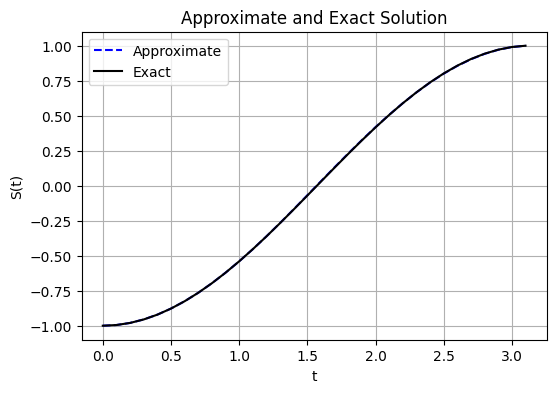

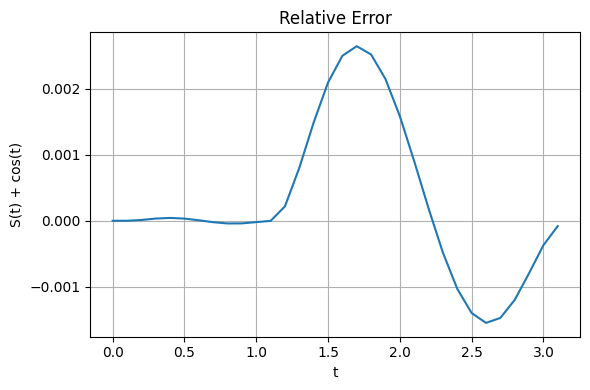

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Define parameters
f = lambda t, s: np.sin(t) # ODE
t_eval = np.arange(0,np.pi,0.1)
Approx = solve_ivp(f, [0, np.pi], [-1], method = 'RK45', t_eval = t_eval)
Exact = -np.cos(Approx.t)

# Plot graph
plt.figure(figsize = (6,4))
plt.plot(Approx.t, Approx.y[0], 'b--', label='Approximate')
plt.plot(t_eval, Exact, 'k-', label='Exact')
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Approximate and Exact Solution')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize = (6,4))
plt.plot(Approx.t, Approx.y[0] - Exact)
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.title('Relative Error')
plt.tight_layout()
plt.grid()
plt.show()

As we can see, the error between the approximation and exact solution is very small.

Using *rtol* and *atol* arguments, we can control the relative and absolute tolerances. The solver function maintains the local error estimates less than $atol+rtol\cdot abs(S)$.

Now, use these arguments to make the error less than 1e-7.

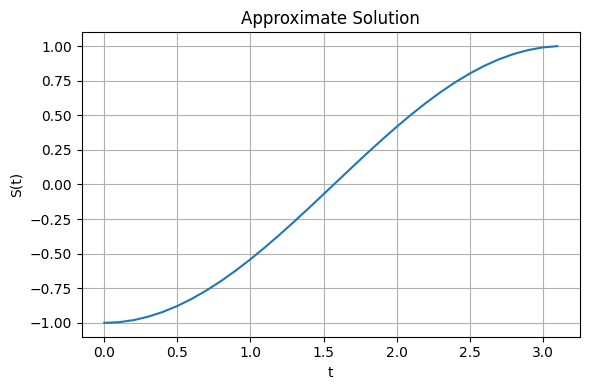

Text(0.5, 1.0, 'Relative Error')

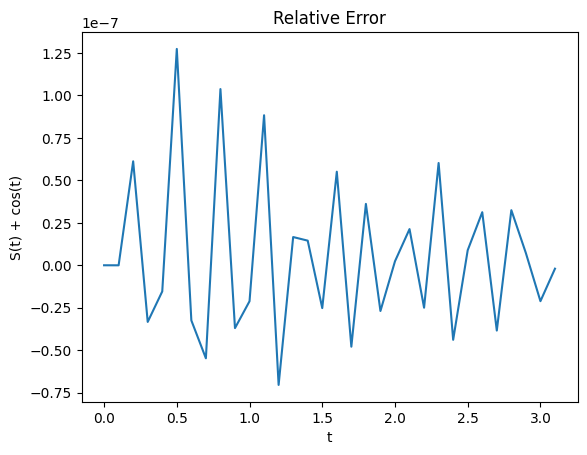

In [ ]:
Approx = solve_ivp(f, [0, np.pi], [-1], method = 'RK45', t_eval = t_eval, rtol = 1e-8, atol = 1e-8)
plt.figure(figsize = (6,4))
plt.plot(Approx.t, Approx.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Approximate Solution')
plt.tight_layout()
plt.grid()
plt.show()
plt.plot(figsize = (6,4))
plt.plot(Approx.t, Approx.y[0] - Exact)
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.title('Relative Error')

\

---
\
$\heartsuit End \heartsuit$